<a href="https://colab.research.google.com/github/ajtmike1/keras-mobile-price-classification/blob/master/%20keras-mobile-price-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import functools

import numpy as np
import tensorflow as tf


In [1]:
from google.colab import files
uploaded = files.upload()

Saving mobile_price_classification_train.csv to mobile_price_classification_train (1).csv


In [0]:
import io
import pandas as pd
dataframe = pd.read_csv(io.BytesIO(uploaded['mobile_price_classification_train.csv']))


In [38]:
dataframe.head

<bound method NDFrame.head of       battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0               842     0          2.2  ...             0     1            1
1              1021     1          0.5  ...             1     0            2
2               563     1          0.5  ...             1     0            2
3               615     1          2.5  ...             0     0            2
4              1821     1          1.2  ...             1     0            1
...             ...   ...          ...  ...           ...   ...          ...
1995            794     1          0.5  ...             1     0            0
1996           1965     1          2.6  ...             1     1            2
1997           1911     0          0.9  ...             1     0            3
1998           1512     0          0.9  ...             1     1            0
1999            510     1          2.0  ...             1     1            3

[2000 rows x 21 columns]>

In [50]:
X = dataframe.iloc[:,:20].values
Y = dataframe.iloc[:,20:21].values
print(X[0])
print(Y[0])

[8.420e+02 0.000e+00 2.200e+00 0.000e+00 1.000e+00 0.000e+00 7.000e+00
 6.000e-01 1.880e+02 2.000e+00 2.000e+00 2.000e+01 7.560e+02 2.549e+03
 9.000e+00 7.000e+00 1.900e+01 0.000e+00 0.000e+00 1.000e+00]
[1]


In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X[0])
print(Y[0])

[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]
[1]


In [53]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()
print(Y)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [0]:
#Build keras model
import keras as K
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=64)

Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 0s 60us/step - loss: 1.4923 - accuracy: 0.2344 - val_loss: 1.3973 - val_accuracy: 0.3200
Epoch 2/100
1800/1800 [==============================] - 0s 19us/step - loss: 1.3942 - accuracy: 0.2983 - val_loss: 1.3446 - val_accuracy: 0.3600
Epoch 3/100
1800/1800 [==============================] - 0s 19us/step - loss: 1.3400 - accuracy: 0.3494 - val_loss: 1.3038 - val_accuracy: 0.4000
Epoch 4/100
1800/1800 [==============================] - 0s 19us/step - loss: 1.2946 - accuracy: 0.3972 - val_loss: 1.2580 - val_accuracy: 0.4600
Epoch 5/100
1800/1800 [==============================] - 0s 19us/step - loss: 1.2465 - accuracy: 0.4356 - val_loss: 1.2069 - val_accuracy: 0.4700
Epoch 6/100
1800/1800 [==============================] - 0s 20us/step - loss: 1.1912 - accuracy: 0.4811 - val_loss: 1.1442 - val_accuracy: 0.5150
Epoch 7/100
1800/1800 [==============================] - 0s 21us/step - loss:

In [0]:
Y_pred = model.predict(X_test)
#convert predictions to label
pred = list()
for i in range(len(Y_pred)):
  pred.append(np.argmax(Y_pred[i]))
#convert one hot encoded test label to label
test = list()
for i in range(len(Y_test)):
  test.append(np.argmax(Y_test[i]))

In [59]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred, test)
print('Accuracy is:', a*100)


Accuracy is: 91.5


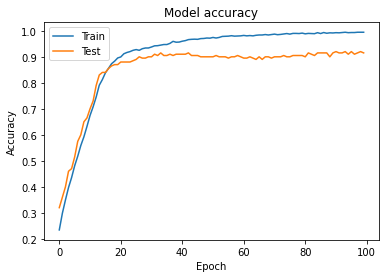

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()